<a href="https://colab.research.google.com/github/dnevo/Practicum/blob/master/S04_Statistical_Data_Analysis_%E2%80%93_hypothesis_average_profit_Mobile_carrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Hi Doron,

I have checked you work and left comments in such cells. Cells are of two types:

<div class="alert alert-block alert-danger">
<p> <strong> A red colored cell </strong> indicates that you need to improve or adjust part of the project above. </p>
</div>
<div class="alert alert-block alert-info">
<p> <strong> A blue colored cell </strong> indicates that no improvements are needed in the cells above. May include some suggestions and recommendations.</p>
</div>

Hope it all will be clear to you :)

You did a good job 😀. You  understand what you are doing and why - 👍.

There is a mistake in the interpretation of the test results, I hope you will take this into account in your future projects :)

The project is accepted :)

*Good luck!*

------------

In [69]:
import pandas as pd
import numpy as np
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:11,.2f}'.format

### Step 1. Open the data file and study the general information. 

In [70]:
megaline_calls = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/megaline_plans.csv')
megaline_users = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/megaline_users1.csv')

## megaline_users
As can be seen below:
1. no missing data
2.  `reg_date` and `churn_date` need to be converted to datetime in order to be more useful
3. The state (region) is embedded in the `city` column - we will have to extract it.
4. `churn_date' only 34 non-Nan values - churn rate is quite low...

In [71]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [72]:
megaline_users.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## megaline_plans

In [73]:
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## megaline_calls
As can be seen below:
1. no missing data
2.  `call_date` need to be converted to datetime in order to be more useful

In [74]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [75]:
print(megaline_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


### megaline_internet
As can be seen below:
1. no missing data
2. session_date need to be converted to datetime in order to be more useful

In [76]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [77]:
print(megaline_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


## megaline_messages
As can be seen below:
1. no missing data
2.  `message_date` need to be converted to datetime in order to be more useful

In [78]:
print(megaline_messages.head())
print(megaline_messages.info())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Good :)

You should also check for duplicates :)

------------

### Step 2. Prepare the data
#### Convert type dates columns to datetime

In [79]:
# source format example: 2018-05-24
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format='%Y-%m-%d')
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')

#### Create `area` column by extracting from `city`
The category will contains 'NY' (Ney York area) and 'OTHER'.

In [80]:
def area(row):
  city_acronym = row['city'].split(',')[1][1:-4]  # Ex. 'NY-NJ-PA' <-- 'New York-Newark-Jersey City, NY-NJ-PA MSA'
  if city_acronym in ['NY-NJ-PA', 'NY']:
    return 'NY'
  else:
    return 'OTHER'
megaline_users['area'] = megaline_users.apply(area, axis=1)
print(megaline_users['area'].value_counts())

OTHER    414
NY        86
Name: area, dtype: int64


**Errors in data** There are many calls with zero duration (19.5%). An explation for it might be that unanswered calls are included in the file. We will drop them since they are not billable.
<br>**Note:** There also data sessions with zero usage (13.1%) - however according to Yandex experts, this is valid - therfore no measure wil be taken.

In [81]:
print('total number of calls=',megaline_calls['duration'].count())
print('total number of zero-duration calls=', megaline_calls['duration'][megaline_calls['duration']==0].count())
megaline_calls.query('duration > 0', inplace=True)  # removal of calls records with zero duration
print('total number of sessions=',megaline_internet['mb_used'].count())
print('total number of zero-usage sessions=', megaline_internet['mb_used'][megaline_internet['mb_used']==0].count())

total number of calls= 137735
total number of zero-duration calls= 26834
total number of sessions= 104825
total number of zero-usage sessions= 13747


We will round up (ceiling) the call duration to minutes (1 sec convert to 1 minutes) - as charged by megaline

In [82]:
megaline_calls['duration'] = np.ceil(megaline_calls['duration'])

As can be seen below, the period of consumption is the whole  2018 (1/1/2018 - 31/12/2018):

In [83]:
print('reg_date min:', megaline_users['reg_date'].min(), ', max=', megaline_users['reg_date'].max())
print('churn_date min:', megaline_users['churn_date'].min(), ', max=', megaline_users['churn_date'].max())
print('call_date min:', megaline_calls['call_date'].min(), ', max=', megaline_calls['call_date'].max())
print('session_date min:', megaline_internet['session_date'].min(), ', max=', megaline_internet['session_date'].max())
print('message_date min:', megaline_messages['message_date'].min(), ', max=', megaline_messages['message_date'].max())

reg_date min: 2018-01-01 00:00:00 , max= 2018-12-31 00:00:00
churn_date min: 2018-07-31 00:00:00 , max= 2018-12-31 00:00:00
call_date min: 2018-01-15 00:00:00 , max= 2018-12-31 00:00:00
session_date min: 2018-01-15 00:00:00 , max= 2018-12-31 00:00:00
message_date min: 2018-01-15 00:00:00 , max= 2018-12-31 00:00:00


We will create a `users` Dataframe based on the information we will need out of `megaline_users` Dataframe:
- Copy as-is: `user_id`, `age`, `area`, `plan`
- `reg_month`: the registration month based on `reg_date`
- `churn_date` the curn montn based on `churn_date`. Note: We will replace NaNs in `churn_date` by 2010-12-31 (the last day of the measurement period) - it is required for the calculations we are about to do.
- The plan information from `megaline_plans` will be merged into the table.
- `usd_per_mb` will be used instead of `usd_per_gb`

In [87]:
users = megaline_users[['user_id', 'age', 'area', 'plan']].copy()
users['reg_month'] = megaline_users['reg_date'].dt.month
users['churn_month'] = megaline_users['churn_date'].fillna(pd.Timestamp('2018-12-31')).dt.month
users = users.merge(megaline_plans,left_on='plan',right_on='plan_name')
users['usd_per_mb'] = users['usd_per_gb'] / 1024
users.drop(columns=['plan_name','usd_per_gb'],inplace=True)
users.head()

,user_id,age,area,plan,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_message,usd_per_minute,usd_per_mb
0,1000,45,OTHER,ultimate,12,12,1000,30720,3000,70,0.01,0.01,0.01
1,1006,73,OTHER,ultimate,11,12,1000,30720,3000,70,0.01,0.01,0.01
2,1008,53,OTHER,ultimate,8,12,1000,30720,3000,70,0.01,0.01,0.01
3,1011,73,OTHER,ultimate,1,12,1000,30720,3000,70,0.01,0.01,0.01
4,1013,50,OTHER,ultimate,12,12,1000,30720,3000,70,0.01,0.01,0.01


We will create  tables: for the number of calls made, and for minutes spent - per user per month (12 columns for the months)

In [88]:
megaline_calls = megaline_calls.merge(users, how='left', on='user_id')  # merge users information into the calls dataframe
megaline_calls['month'] = megaline_calls['call_date'].dt.month
user_calls_per_month = megaline_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='count')
user_calls_per_month.reset_index(inplace=True)
user_calls_per_month.head()

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.00
1,1001,nan,nan,nan,nan,nan,nan,nan,22.00,38.00,47.00,49.00,46.00
2,1002,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.00,48.00,38.00
3,1003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,118.00
4,1004,nan,nan,nan,nan,19.00,33.00,45.00,42.00,32.00,47.00,45.00,43.00


In [89]:
user_minutes_per_month = megaline_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum') #,fill_value=0)
user_minutes_per_month.reset_index(inplace=True)
user_minutes_per_month.head()

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,124.00
1,1001,nan,nan,nan,nan,nan,nan,nan,182.00,315.00,393.00,426.00,412.00
2,1002,nan,nan,nan,nan,nan,nan,nan,nan,nan,59.00,386.00,384.00
3,1003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"1,104.00"
4,1004,nan,nan,nan,nan,193.00,275.00,381.00,354.00,301.00,365.00,476.00,427.00


We will create a table for the number of messages per user per month (12 columns for the months)

In [90]:
megaline_messages = megaline_messages.merge(users, how='left', on='user_id')  # merge users information into the messages dataframe
megaline_messages['month'] = megaline_messages['message_date'].dt.month
user_messages_per_month = megaline_messages.pivot_table(index='user_id', columns='month', values='message_date', aggfunc='count')
user_messages_per_month.reset_index(inplace=True)
user_messages_per_month.head()

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00
1,1001,nan,nan,nan,nan,nan,nan,nan,30.00,44.00,53.00,36.00,44.00
2,1002,nan,nan,nan,nan,nan,nan,nan,nan,nan,15.00,32.00,41.00
3,1003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,50.00
4,1004,nan,nan,nan,nan,7.00,18.00,26.00,25.00,21.00,24.00,25.00,31.00


We will create tables for the internet consumption (in MB) per user per month (12 columns for the months)

In [91]:
megaline_internet = megaline_internet.merge(users, how='left', on='user_id')  # merge users information into the internet dataframe
megaline_internet['month'] = megaline_internet['session_date'].dt.month
user_internet_per_month = megaline_internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum')
user_internet_per_month.reset_index(inplace=True)
user_internet_per_month.head()

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"1,901.47"
1,1001,nan,nan,nan,nan,nan,nan,nan,"6,919.15","13,314.82","22,330.49","18,504.30","19,369.18"
2,1002,nan,nan,nan,nan,nan,nan,nan,nan,nan,"6,552.01","19,345.08","14,396.24"
3,1003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"27,044.14"
4,1004,nan,nan,nan,nan,"6,547.21","20,672.82","24,516.62","27,981.74","18,852.72","14,541.63","21,850.78","21,389.29"


Calculate the monthly profit per each user

In [92]:
def set_month(row, col):
  if row['reg_month'] <= col <= row['churn_month']:
    return 0
  else:
    return np.nan
'''
STEP 1 - create a dataframe (user1) aggregating all the information per user, include the monthly consumption of each of the 3 traffic type (calls, messages, internet)
'''
users1 = users.merge(user_minutes_per_month, on='user_id', how='left')
users1 = users1.merge(user_messages_per_month,on='user_id', how='left',suffixes=('_minutes', '_messages'))
user_internet_per_month.columns = ['user_id', '1_mb', '2_mb', '3_mb', '4_mb', '5_mb', '6_mb', '7_mb', '8_mb', '9_mb', '10_mb', '11_mb', '12_mb']  # rename the 12 cmonths columns for internet consuption
users1 = users1.merge(user_internet_per_month,on='user_id', how='left')

'''
STEP 2 - calculate the profit per month
'''
# create 12 new columns to calculate the monthly profit per user.
#users1['1_tot']=users1['2_tot']=users1['3_tot']=users1['4_tot']=users1['5_tot']=users1['6_tot']=users1['7_tot']=users1['8_tot']=users1['9_tot']=users1['10_tot']=users1['11_tot']=users1['12_tot']=0
for i in range(12):
  users1[str(i+1)+'_tot'] = users1.apply(lambda row: set_month(row, i+1), axis=1)

print(list(zip(users1.columns, range(len(users1.columns)))))  # retrieve the columns ids - this will enable us to iterate over the months using .iloc
TOT_1 = 49
MINUTES_1 = 13
MESSAGES_1 = 25
MB_1 = 37
for i in range(12):
  # monthly_pay considered only during registration period
  users1.iloc[:,TOT_1+i] += users1['usd_monthly_pay'].where(
      (users1['reg_month'] <= (1+i) ) & ((1+i) <= users1['churn_month']), other=0)
  excess_minutes = (users1.iloc[:,MINUTES_1+i]- users1['minutes_included']).where((users1.iloc[:,MINUTES_1+i]- users1['minutes_included'])> 0, other=0)
  users1.iloc[:,TOT_1+i] += excess_minutes * users1['usd_per_minute']

  excess_messages = (users1.iloc[:,MESSAGES_1+i]- users1['messages_included']).where((users1.iloc[:,MESSAGES_1+i]- users1['messages_included'])> 0, other=0)
  users1.iloc[:,TOT_1+i] += excess_messages * users1['usd_per_message']

  excess_mb = (users1.iloc[:,MB_1+i]- users1['mb_per_month_included']).where((users1.iloc[:,MB_1+i]- users1['mb_per_month_included'])> 0, other=0)
  users1.iloc[:,TOT_1+i] += excess_mb * users1['usd_per_mb']

users1.head()

[('user_id', 0), ('age', 1), ('area', 2), ('plan', 3), ('reg_month', 4), ('churn_month', 5), ('messages_included', 6), ('mb_per_month_included', 7), ('minutes_included', 8), ('usd_monthly_pay', 9), ('usd_per_message', 10), ('usd_per_minute', 11), ('usd_per_mb', 12), ('1_minutes', 13), ('2_minutes', 14), ('3_minutes', 15), ('4_minutes', 16), ('5_minutes', 17), ('6_minutes', 18), ('7_minutes', 19), ('8_minutes', 20), ('9_minutes', 21), ('10_minutes', 22), ('11_minutes', 23), ('12_minutes', 24), ('1_messages', 25), ('2_messages', 26), ('3_messages', 27), ('4_messages', 28), ('5_messages', 29), ('6_messages', 30), ('7_messages', 31), ('8_messages', 32), ('9_messages', 33), ('10_messages', 34), ('11_messages', 35), ('12_messages', 36), ('1_mb', 37), ('2_mb', 38), ('3_mb', 39), ('4_mb', 40), ('5_mb', 41), ('6_mb', 42), ('7_mb', 43), ('8_mb', 44), ('9_mb', 45), ('10_mb', 46), ('11_mb', 47), ('12_mb', 48), ('1_tot', 49), ('2_tot', 50), ('3_tot', 51), ('4_tot', 52), ('5_tot', 53), ('6_tot', 54)

,user_id,age,area,plan,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_message,usd_per_minute,usd_per_mb,1_minutes,2_minutes,3_minutes,4_minutes,5_minutes,6_minutes,7_minutes,8_minutes,9_minutes,10_minutes,11_minutes,12_minutes,1_messages,2_messages,3_messages,4_messages,5_messages,6_messages,7_messages,8_messages,9_messages,10_messages,11_messages,12_messages,1_mb,2_mb,3_mb,4_mb,5_mb,6_mb,7_mb,8_mb,9_mb,10_mb,11_mb,12_mb,1_tot,2_tot,3_tot,4_tot,5_tot,6_tot,7_tot,8_tot,9_tot,10_tot,11_tot,12_tot
0,1000,45,OTHER,ultimate,12,12,1000,30720,3000,70,0.01,0.01,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,124.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"1,901.47",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,70.00
1,1006,73,OTHER,ultimate,11,12,1000,30720,3000,70,0.01,0.01,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.00,59.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,15.00,139.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"2,068.37","32,118.82",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,70.00,79.56
2,1008,53,OTHER,ultimate,8,12,1000,30720,3000,70,0.01,0.01,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,476.00,446.00,634.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.00,37.00,26.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,"17,106.99","23,676.72","14,689.33",nan,nan,nan,nan,nan,nan,nan,70.00,70.00,70.00,70.00,70.00
3,1011,73,OTHER,ultimate,1,12,1000,30720,3000,70,0.01,0.01,0.01,nan,nan,nan,nan,nan,118.00,499.00,486.00,484.00,504.00,505.00,311.00,nan,nan,nan,nan,nan,21.00,53.00,54.00,60.00,64.00,58.00,61.00,nan,nan,nan,nan,nan,"6,685.11","21,046.41","21,099.37","16,638.46","24,575.65","22,102.97","19,630.63",70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00
4,1013,50,OTHER,ultimate,12,12,1000,30720,3000,70,0.01,0.01,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,219.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"20,113.92",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,70.00


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

------------

### Step 3. Analyse the data
Describe the clients' behavior. For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per month. Calculate the mean, dispersion and standard deviation. Plot histograms. Describe the distributions.


### Number of users per month
As we can see in the table and the plot bellow, apparently the Megaline network was launched in the beginning of 2018: just 6 subscribers in January (1.2%), 15 in February and up to 460 in December. The number of subscribers in Surf is double than the number of subssribers in Ultimate (311 vs. 149)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Number of users per plan and month:
          1   2   3   4   5   6    7    8    9    10   11   12
plan                                                          
surf       2   9  23  50  75  96  120  159  191  231  277  311
ultimate   4   6  12  21  29  45   59   71   86  105  125  149


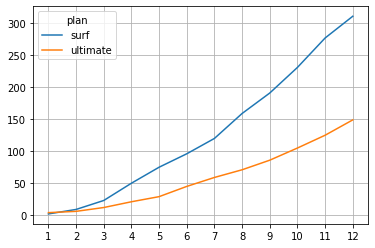

In [93]:
minutes_per_users_months = users1.groupby('plan')['1_minutes', '2_minutes', '3_minutes', '4_minutes', '5_minutes', 
                              '6_minutes', '7_minutes', '8_minutes', '9_minutes', '10_minutes', '11_minutes', '12_minutes']
users_per_month = minutes_per_users_months.count()
users_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Number of users per plan and month:')
print(users_per_month)
users_per_month.transpose().plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],grid=True);

#### Average number of minutes per month in 2018

The average number of minutes is around 450 minutes per month. It is interesting that this is true for both 2 plans!

Mean of Minutes per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf          203.00      297.00      330.00      351.54      410.24      435.79      453.73      417.85      420.73      440.89      432.49      484.50
ultimate      193.50      470.33      304.25      336.86      406.24      387.44      427.07      421.44      437.51      455.03      452.32      465.26


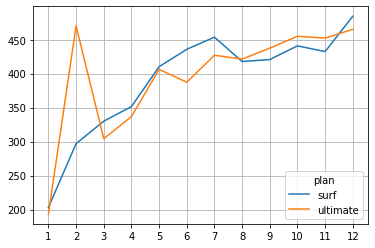

In [94]:
minutes_per_month = minutes_per_users_months.mean()
minutes_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Mean of Minutes per plan and month:')
print(minutes_per_month)
minutes_per_month.transpose().plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],grid=True);

#### Standard deviation of average number of minutes per month in 2018

As can be noted in the table below, the standard deviation is developing to around 245 (minutes) for both plans - indicating a very high dispertion / variation.

In [95]:
std_minutes_per_month = minutes_per_users_months.std()
std_minutes_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Standard Deviation of Minutes per plan and month:')
print(std_minutes_per_month)

Standard Deviation of Minutes per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf          125.87      228.53      189.23      225.54      238.62      209.99      244.54      228.30      211.14      220.68      220.79      244.71
ultimate      128.73      233.12      248.97      186.79      209.38      194.69      269.38      231.61      238.89      229.81      241.50      245.89


#### Minutes per user in 12/2018 - Distribution
As in the below plots, the distribution of the number of the call is skewed to the right (positively) - this is true for both plans. In addition the distribution of the surf plan includes many outliers in the range of 1000-1200 minutes.

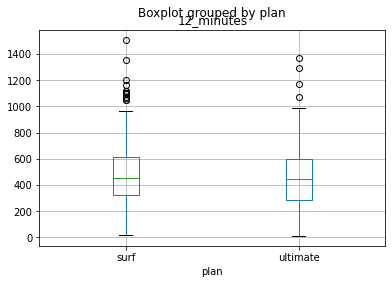

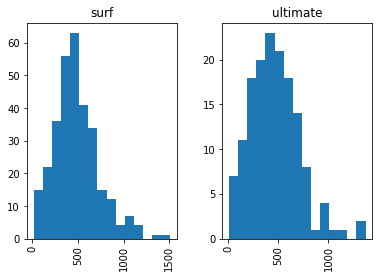

In [96]:
users1.boxplot(column='12_minutes',by='plan');
users1.hist(column='12_minutes',by='plan',bins=15);

#### Average number of messages per month in 2018
The average number of messages per user per month is growing lineary during the months and actuly doubling from 25/user in 1/2018 to 50/user in 12/2018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Number of messages per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf           21.00       21.60       21.94       24.17       33.02       33.62       35.95       37.60       39.52       42.43       40.55       48.33
ultimate       20.67       25.17       34.71       28.94       44.33       36.29       41.21       47.93       45.90       46.98       47.60       53.94


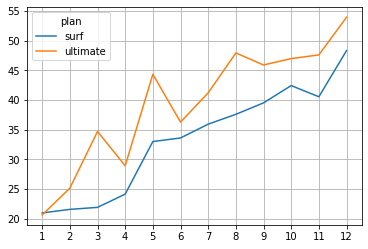

In [111]:
messages_per_users_months = users1.groupby('plan')['1_messages', '2_messages', '3_messages', '4_messages', '5_messages', 
                              '6_messages', '7_messages', '8_messages', '9_messages', '10_messages', '11_messages', '12_messages']
messages_per_month = messages_per_users_months.mean()
messages_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Number of messages per plan and month:')
print(messages_per_month)
messages_per_month.transpose().plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],grid=True);

#### Standard deviation of average number of messages in 2018
The STD is around 35 messages/user for both plans - a quite high figure.

In [110]:
std_messages_per_month = messages_per_users_months.std()
std_messages_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Standard Deviation of messages per plan and month:')
print(std_messages_per_month)

Standard Deviation of messages per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf             nan       22.65       18.76       23.11       29.46       30.60       30.13       31.83       30.71       35.14       31.66       36.81
ultimate       17.62       21.57       24.78       22.65       35.31       28.41       29.29       32.16       30.06       33.15       33.02       37.06


#### Average Internet usage (mb/month) in 2018
The average Internet usage in per user per month is 17,000 mb or 17GB/user per month. Note that in the first months the usage is smaller, but as the number of users was very small in the first months the first months can be be discarded.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Web traffic (mb) per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf        4,874.86   12,178.84   13,345.44   12,228.78   14,119.73   15,623.67   16,923.46   17,112.22   16,677.40   17,533.28   16,455.55   18,189.67
ultimate    6,918.09   17,128.81   18,321.52   16,121.65   16,624.48   15,337.92   16,344.74   17,814.72   16,969.87   17,780.29   17,033.69   18,323.19


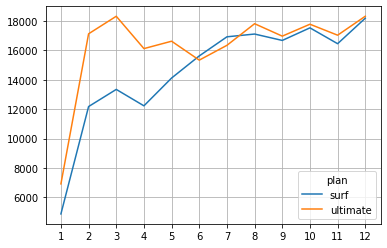

In [109]:
mb_per_users_months = users1.groupby('plan')['1_mb', '2_mb', '3_mb', '4_mb', '5_mb', 
                              '6_mb', '7_mb', '8_mb', '9_mb', '10_mb', '11_mb', '12_mb']
mb_per_month = mb_per_users_months.mean()
mb_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Web traffic (mb) per plan and month:')
print(mb_per_month)
mb_per_month.transpose().plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],grid=True);

#### Standard deviation of average mb/user in 2018
The STD is around 8,000 mb/user for both plans - relatively less than the STDs of the 2 other traffic types (calls and messages).

In [108]:
std_mb_per_month = mb_per_users_months.std()
std_mb_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Standard Deviation of Web traffic (in mb) per plan and month:')
print(std_mb_per_month)

Standard Deviation of Web traffic (in mb) per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf        4,270.83    6,608.55    8,261.09    7,564.51    7,724.80    6,715.08    7,927.37    8,402.18    7,081.16    7,708.76    7,460.79    8,445.83
ultimate    4,049.04    6,135.89   11,846.48    9,403.65    7,535.92    8,486.14    8,271.59    7,774.77    7,024.18    7,384.59    7,588.77    7,866.47


#### Average Profit per plan plan in 2018
The average Profit per Ultimate user per month is 70 USD - this can be explained by the generous capacity provided by the package...
On the other hand for the Surf user, the profit is lineary increasing over the 12 months period from 20 usd to 63 usd.

Profit per plan and month:
                  1           2           3           4           5           6           7           8           9           10          11          12
plan                                                                                                                                                    
surf           20.00       21.97       26.06       27.67       33.30       34.08       43.39       48.27       46.82       54.59       52.24       63.65
ultimate       70.00       70.00       70.99       71.12       70.23       70.80       71.10       71.65       71.25       71.65       71.37       72.97


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


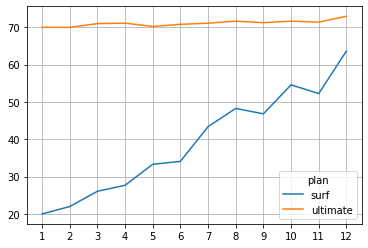

In [107]:
profit_per_users_months = users1.groupby('plan')['1_tot', '2_tot', '3_tot', '4_tot', '5_tot', 
                              '6_tot', '7_tot', '8_tot', '9_tot', '10_tot', '11_tot', '12_tot']
profit_per_month = profit_per_users_months.mean()
profit_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Profit per plan and month:')
print(profit_per_month)
profit_per_month.transpose().plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],grid=True);

#### Standard deviation of average profit plan in 2018
We can notice substantial difference between STDs of users of the 2 plans - both STD are gradualy growing. The STD of surf reach 65 at the end of the period while the STD of Ultimum reaches 14.

In [106]:
std_profit_per_month = profit_per_users_months.std()
std_profit_per_month.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Standard Deviation of Profit per plan and month:')
std_profit_per_month

Standard Deviation of Profit per plan and month:


,1,2,3,4,5,6,7,8,9,10,11,12
plan,,,,,,,,,,,,
surf,0.00,8.54,21.33,22.88,33.16,33.92,45.06,52.21,42.74,52.39,47.35,65.56
ultimate,0.00,0.00,5.70,6.79,1.86,5.68,7.72,9.26,6.53,10.98,8.60,13.81


#### Average Profit per area

Profit per area and month:
               1           2           3           4           5           6           7           8           9           10          11          12
area                                                                                                                                                 
NY          30.00       30.19       32.90       34.15       39.23       39.15       43.90       53.21       55.89       62.56       63.21       60.42
OTHER       41.79       40.48       41.75       41.98       45.62       47.57       54.29       56.54       54.63       59.55       57.54       67.96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


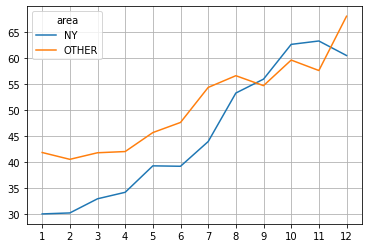

In [103]:
profit_per_area_months = users1.groupby('area')['1_tot', '2_tot', '3_tot', '4_tot', '5_tot', 
                              '6_tot', '7_tot', '8_tot', '9_tot', '10_tot', '11_tot', '12_tot']
profit_per_area = profit_per_area_months.mean()
profit_per_area.columns=[1,2,3,4,5,6,7,8,9,10,11,12]
print('Profit per area and month:')
print(profit_per_area)
profit_per_area.transpose().plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],grid=True);

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Great :)

You should provide graphs with titles and name their axis. These attributes help study the graph.

------------

### Step 4. Test the hypotheses
#### Testing hypothesis that profit from users of Ultimate and Surf plans in 12/2018 is the same
THe formulation we use:
- H0: The mean (average) profit from users of Ultimate and Surf plans in 12/2018 is the same.
- H1: The mean (average) profit from users of Ultimate and Surf plans in 12/2018 is NOT the same.
The critria we will use is T-Test with Alpha value of 0.05 which is the common practice.

In [104]:
from scipy import stats as st
profit_surf_12_2018 = users1.query('plan == "surf"')['12_tot'].copy()
profit_ultimate_12_2018 = users1.query('plan == "ultimate"')['12_tot'].copy()
profit_surf_12_2018.dropna(inplace=True)
profit_ultimate_12_2018.dropna(inplace=True)

alpha = .05 # critical statistical significance
results = st.ttest_ind(
        profit_surf_12_2018, 
        profit_ultimate_12_2018, equal_var=False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("The mean (average) profit from users of Ultimate and Surf plans in 12/2018 is the same")
else:
        print("The mean (average) profit from users of Ultimate and Surf plans in 12/2018 is NOT the same")

p-value:  0.014714134718437265
The mean (average) profit from users of Ultimate and Surf plans in 12/2018 is the same


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Very good :)

Actually, we reject null hypothesis if p-value is less than alpha. So, here you should conclude that profit is not the same.

------------

#### Testing hypothesis that profit from the users in NY-NJ area and users from other regions in 12/2018 is the same
THe formulation we use:
- H0: The mean (average) profit from users of NY-NJ and other regions in 12/2018 is the same.
- H1: The mean (average) profit from users of NY-NJ and other regions in 12/2018 is NOT the same.
The critria we will use is T-Test with Alpha value of 0.05 which is the common practice.

In [105]:
profit_ny_12_2018 = users1.query('area == "NY"')['12_tot'].copy()
profit_other_12_2018 = users1.query('area == "OTHER"')['12_tot'].copy()
profit_ny_12_2018.dropna(inplace=True)
profit_other_12_2018.dropna(inplace=True)

alpha = .05 # critical statistical significance
results = st.ttest_ind(
        profit_ny_12_2018, 
        profit_other_12_2018, equal_var=False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("The mean (average) profit from users in NY-NJ and users in other regions in 12/2018 is the same")
else:
        print("The mean (average) profit from users in NY-NJ and users in other regions in 12/2018 is NOT the same")

p-value:  0.1842915540534753
The mean (average) profit from users in NY-NJ and users in other regions in 12/2018 is NOT the same


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Same here: everything is great, but conclusion is not right :(

------------

### Step 5. Write an overall conclusion
1. The information received for analysis contains sample of 500 users out of total population (size unknown).
2. Churn rate is low – just 6.8% - Megaline is doing a good job in retention.
3. The number of Surf users is double than those of Ultimate.
4. Number of calls: 
  - Surf: average consumption is almost reaching the the package limit 465 / 500 – this means that Megaline is doing nice profit on extra calls from Surf.
  - Ultimate – underusage of the package by the users.
Messages – underusage of the package in both tariff plans – no surprise as SMS get less and less used.
5. Internet usage: 
  - Surf – even average user is exceeding the package (18GB / 15 GB)
  - Megaline make big money here… Ultimate – underusage in average 18GB / 30GB.
6. Based on above – the network is making very nice profits on Surf (average profit of 64 usd on package of 20 usd) especially due to the Internet traffic.
7. When looking on the figures – we can clearly notice that usage of average surf user internet increases during the year – this is the main reason of high profits. This may be probably due to promotions – the recommendation is keeping with this direction.
8. As concluded above the mean profit from Surf and Ultimate subscribers is the same – although these are different segments.
9. Profit in NY area is a bit lower than from other region in the country – maybe local promotion in that area can help in increasing revenues.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------